## Importing python libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
holidays_de= holidays.Germany()
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

## Loading Preprocessed Data

In [99]:
df_all= pd.read_csv('../data_cleaned/merged/Merge_all_prices_load_gen_res.csv')
df_all.head()

,date,year,month,day,dayofyear,hour,week,dayofweek,price,period_start_utc,...,off_wind_da,off_wind_act,on_wind_da,on_wind_act,solar_da,solar_act,gen_forecast_da,gen_actual,res_sum_da,res_sum_act
0,2015-01-04,2015,1,4,4,23,1,6,22.34,2015-01-04 23:00:00,...,192.125,478.0200,11675.5250,14223.2775,0.0,0.1700,NaN,57028.5925,11867.6500,14701.4675
1,2015-01-05,2015,1,5,5,0,2,0,17.93,2015-01-05 00:00:00,...,192.375,468.5525,11924.5575,14207.5025,0.0,0.2075,NaN,56318.8525,12116.9325,14676.2625
2,2015-01-05,2015,1,5,5,1,2,0,15.17,2015-01-05 01:00:00,...,195.000,465.5550,12000.4075,14439.8025,0.0,0.1800,NaN,56216.6000,12195.4075,14905.5375
3,2015-01-05,2015,1,5,5,2,2,0,16.38,2015-01-05 02:00:00,...,193.625,454.0175,12108.2650,14584.6825,0.0,0.2000,NaN,56394.7350,12301.8900,15038.9000
4,2015-01-05,2015,1,5,5,3,2,0,17.38,2015-01-05 03:00:00,...,187.625,457.4750,12196.1175,15071.2450,0.0,0.1950,NaN,57670.7700,12383.7425,15528.9150


In [100]:

df_all.drop(columns=['date','year','month','day','hour','dayofyear','week','dayofweek'], inplace=True)
df_all.head()

,price,period_start_utc,period_end_utc,c_by_hour,load_forecast_da,load_actual,off_wind_da,off_wind_act,on_wind_da,on_wind_act,solar_da,solar_act,gen_forecast_da,gen_actual,res_sum_da,res_sum_act
0,22.34,2015-01-04 23:00:00,2015-01-05 00:00:00,1,50326.4700,53613.9750,192.125,478.0200,11675.5250,14223.2775,0.0,0.1700,NaN,57028.5925,11867.6500,14701.4675
1,17.93,2015-01-05 00:00:00,2015-01-05 01:00:00,1,48599.1775,51367.7075,192.375,468.5525,11924.5575,14207.5025,0.0,0.2075,NaN,56318.8525,12116.9325,14676.2625
2,15.17,2015-01-05 01:00:00,2015-01-05 02:00:00,1,47364.1200,50369.3225,195.000,465.5550,12000.4075,14439.8025,0.0,0.1800,NaN,56216.6000,12195.4075,14905.5375
3,16.38,2015-01-05 02:00:00,2015-01-05 03:00:00,1,47292.0000,50171.3625,193.625,454.0175,12108.2650,14584.6825,0.0,0.2000,NaN,56394.7350,12301.8900,15038.9000
4,17.38,2015-01-05 03:00:00,2015-01-05 04:00:00,1,48370.0200,51393.2750,187.625,457.4750,12196.1175,15071.2450,0.0,0.1950,NaN,57670.7700,12383.7425,15528.9150


In [101]:
da_cols = ['price', 'period_start_utc', 'period_end_utc', 'c_by_hour','load_forecast_da', 'off_wind_da','on_wind_da', 'solar_da', 'gen_forecast_da', 'res_sum_da']
act_cols = ['period_start_utc', 'period_end_utc','load_actual', 'off_wind_act','on_wind_act', 'solar_act', 'gen_actual', 'res_sum_act']

In [102]:
df_da = df_all[da_cols]
df_act = df_all[act_cols]

In [103]:
df = df_da.copy()


In [104]:
df = df.assign(
    date = pd.to_datetime(df['period_end_utc']).dt.date,
    year = pd.to_datetime(df['period_end_utc']).dt.year,
    month = pd.to_datetime(df['period_end_utc']).dt.month,
    day = pd.to_datetime(df['period_end_utc']).dt.day,
    weekday = pd.to_datetime(df['period_end_utc']).dt.weekday,
    hour = pd.to_datetime(df['period_end_utc']).dt.hour,
    dayofyear = pd.to_datetime(df['period_end_utc']).dt.dayofyear
)

df_act = df_act.assign(
    date = pd.to_datetime(df['period_end_utc']).dt.date,
    year = pd.to_datetime(df['period_end_utc']).dt.year,
    month = pd.to_datetime(df['period_end_utc']).dt.month,
    day = pd.to_datetime(df['period_end_utc']).dt.day,
    weekday = pd.to_datetime(df['period_end_utc']).dt.weekday,
    hour = pd.to_datetime(df['period_end_utc']).dt.hour,
    dayofyear = pd.to_datetime(df['period_end_utc']).dt.dayofyear
)

## Adding Holiday Feature
This feature consider only the public holidays in Germany, which are relevant for the dataset. It is a binary feature that indicates whether a given date is a public holiday or not.

In [105]:
df.drop(columns=['period_end_utc','period_start_utc'], inplace=True)
df.date = pd.to_datetime(df.date)
df['is_holiday']= df ['date'].apply(lambda x: 1 if x in holidays_de else 0)
df.head()

,price,c_by_hour,load_forecast_da,off_wind_da,on_wind_da,solar_da,gen_forecast_da,res_sum_da,date,year,month,day,weekday,hour,dayofyear,is_holiday
0,22.34,1,50326.4700,192.125,11675.5250,0.0,NaN,11867.6500,2015-01-05,2015,1,5,0,0,5,0
1,17.93,1,48599.1775,192.375,11924.5575,0.0,NaN,12116.9325,2015-01-05,2015,1,5,0,1,5,0
2,15.17,1,47364.1200,195.000,12000.4075,0.0,NaN,12195.4075,2015-01-05,2015,1,5,0,2,5,0
3,16.38,1,47292.0000,193.625,12108.2650,0.0,NaN,12301.8900,2015-01-05,2015,1,5,0,3,5,0
4,17.38,1,48370.0200,187.625,12196.1175,0.0,NaN,12383.7425,2015-01-05,2015,1,5,0,4,5,0


# Adding day_type feature
this feature shows either its a weekday, or weekend or a public holiday.
if public holiday and weekend are on same date, it will be labeled as holiday. 

In [106]:
df['day_type']= 'weekday'
df.loc[df['weekday'].isin([5,6]), 'day_type'] = 'weekend'
df.loc[df['is_holiday'] == 1, 'day_type'] = 'holiday'
df.head()

,price,c_by_hour,load_forecast_da,off_wind_da,on_wind_da,solar_da,gen_forecast_da,res_sum_da,date,year,month,day,weekday,hour,dayofyear,is_holiday,day_type
0,22.34,1,50326.4700,192.125,11675.5250,0.0,NaN,11867.6500,2015-01-05,2015,1,5,0,0,5,0,weekday
1,17.93,1,48599.1775,192.375,11924.5575,0.0,NaN,12116.9325,2015-01-05,2015,1,5,0,1,5,0,weekday
2,15.17,1,47364.1200,195.000,12000.4075,0.0,NaN,12195.4075,2015-01-05,2015,1,5,0,2,5,0,weekday
3,16.38,1,47292.0000,193.625,12108.2650,0.0,NaN,12301.8900,2015-01-05,2015,1,5,0,3,5,0,weekday
4,17.38,1,48370.0200,187.625,12196.1175,0.0,NaN,12383.7425,2015-01-05,2015,1,5,0,4,5,0,weekday


In [110]:
df_2018_2025_da = df.query('year >2018').reset_index(drop=True)

In [ ]:
#df_2018_2025_da.to_csv('../data_cleaned/merged/all_data_2018_2025_da.csv', index=False)

In [111]:
df_2018_2025_act = df_act.query('year> 2018').reset_index(drop=True)

In [ ]:
#74df_2018_2025_act.to_csv('../data_cleaned/merged/all_data_2018_2025_act.csv', index=False)

In [112]:
df_2018_2025_da.groupby('year')['price'].describe().round(1).T

year,2019,2020,2021,2022,2023,2024,2025
count,8760.0,8784.0,8760.0,8760.0,8760.0,8784.0,8760.0
mean,37.9,30.7,97.4,236.7,95.7,79.0,89.7
std,15.5,17.5,73.9,143.3,47.6,52.8,52.2
min,-90.0,-83.9,-69.0,-19.0,-500.0,-135.4,-250.3
25%,31.2,22.0,53.4,135.5,76.2,55.9,71.5
50%,38.4,31.2,75.7,209.6,98.5,80.0,92.9
75%,46.4,40.5,113.0,312.0,122.9,102.3,115.0
max,121.5,200.0,620.0,871.0,524.3,936.3,583.4


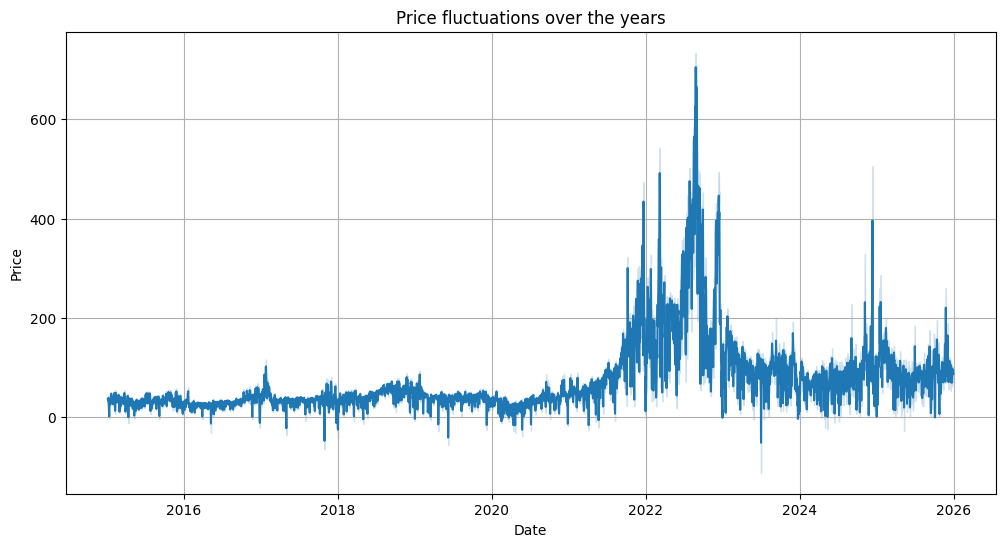

In [14]:
sns.lineplot(data=df, x='date', y='price')
plt.title('Price fluctuations over the years')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid()

# Plot of Daily Price Fluctuations over each year
This plot explains how prices are varying over the year in each year and an abnormal behavior can be seen for 2022.

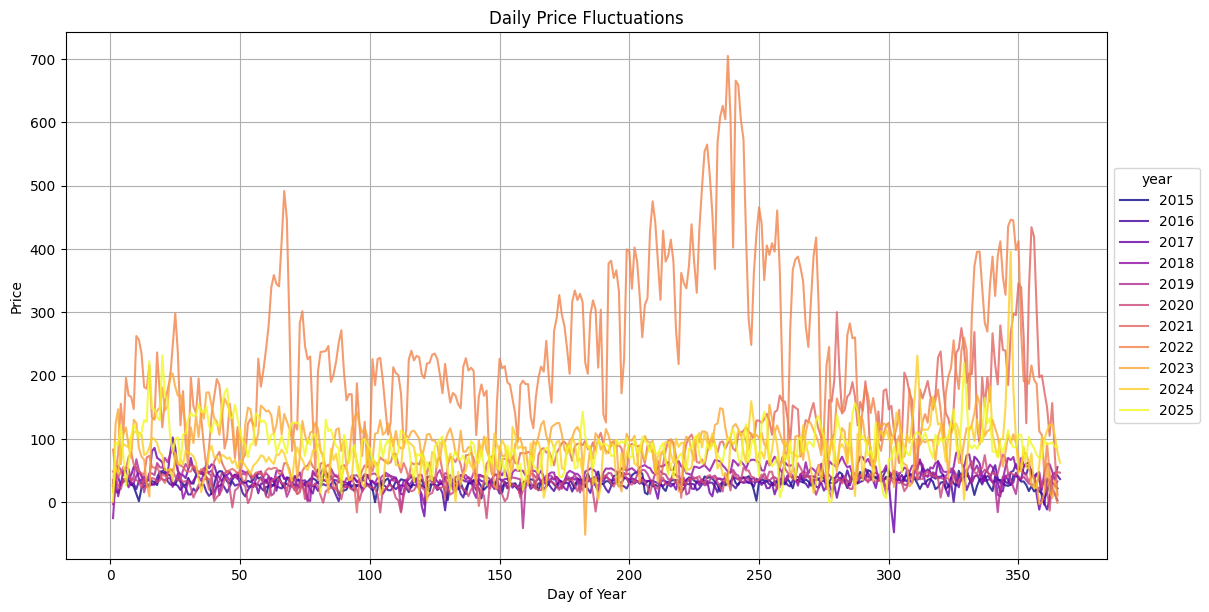

In [15]:
fig, ax = plt.subplots() 

pd.pivot_table(data=df[['year', 'dayofyear', 'price']], index='dayofyear', columns='year')['price'].plot(cmap='plasma', alpha=0.8, ax=ax)
ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.tight_layout()
ax.set(title='Daily Price Fluctuations', ylabel='Price', xlabel='Day of Year');


# Functions to plot hourly and Monthly price fluctuations for given year y

In [16]:
def plot_hourly_price_fluctuations(df, y):    
    df_y=df[df['year'] == y].groupby(['month','day','hour'])['price'].mean().reset_index()
    fig, ax = plt.subplots() 
    pd.pivot_table(data=df_y, index='hour', columns='day')['price'].plot(cmap='plasma', alpha=0.8, ax=ax)
    ax.legend(title='day', loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid()
    ax.set(title=f'Hourly Price Fluctuations {y} year', ylabel='Price', xlabel='Hour of Day');

In [17]:
def plot_monthly_price_fluctuations(df, y):    
    df_y=df[df['year'] == y].groupby(['month','day'])['price'].mean().reset_index()
    fig, ax = plt.subplots() 
    pd.pivot_table(data=df_y, index='day', columns='month')['price'].plot(cmap='plasma', alpha=0.8, ax=ax)
    ax.legend(title='month', loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid()
    ax.set(title=f'Monthly Price Fluctuations {y} year', ylabel='Price', xlabel='Day of Month');

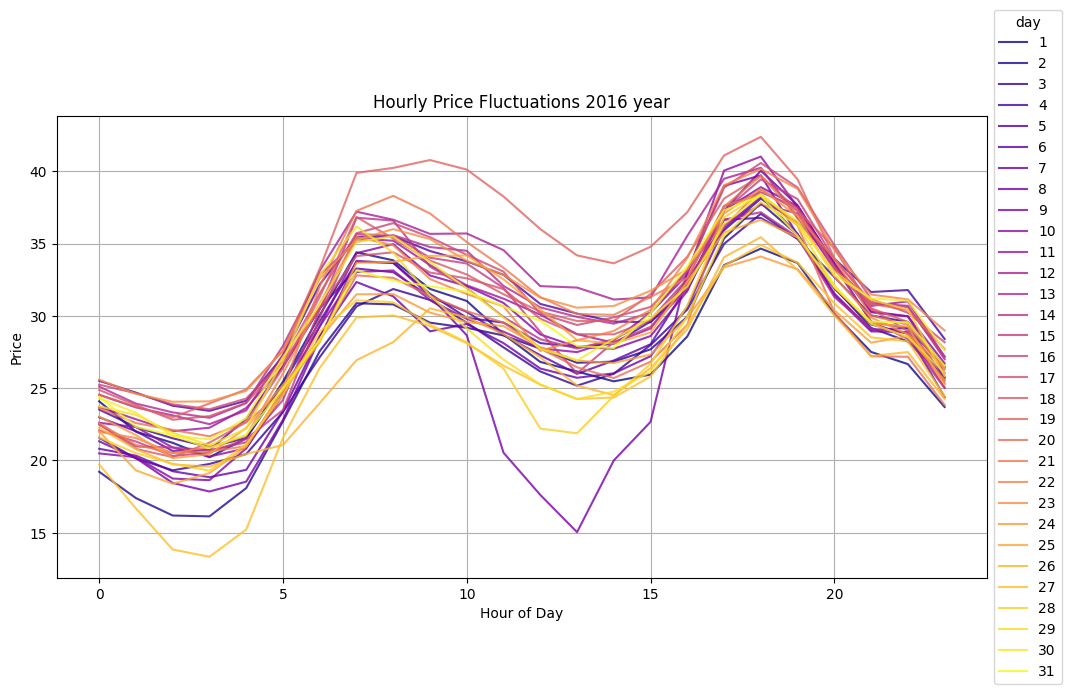

In [18]:
plot_hourly_price_fluctuations(df, 2016)

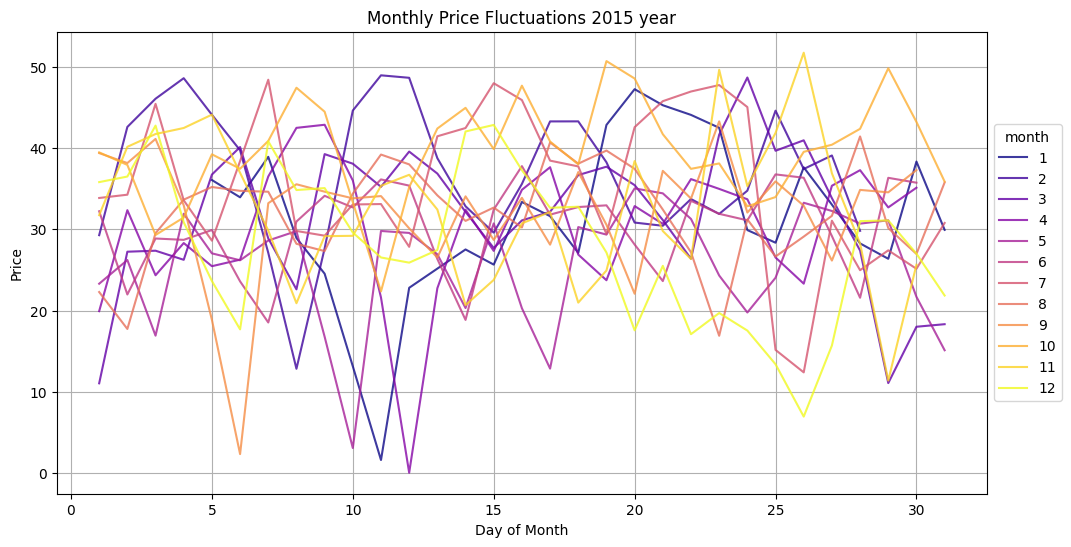

In [19]:
plot_monthly_price_fluctuations(df, 2015)

In [20]:
df[df['year'] == 2015].groupby(['month','weekday'])['price'].mean().reset_index().head(10)

,month,weekday,price
0,1,0,34.837917
1,1,1,34.849167
2,1,2,34.996458
3,1,3,31.262187
4,1,4,34.687292
5,1,5,26.152708
6,1,6,19.021667
7,2,0,34.433021
8,2,1,42.184375
9,2,2,46.361562


[Text(0.5, 1.0, 'Price Fluctuations by Weekday')]

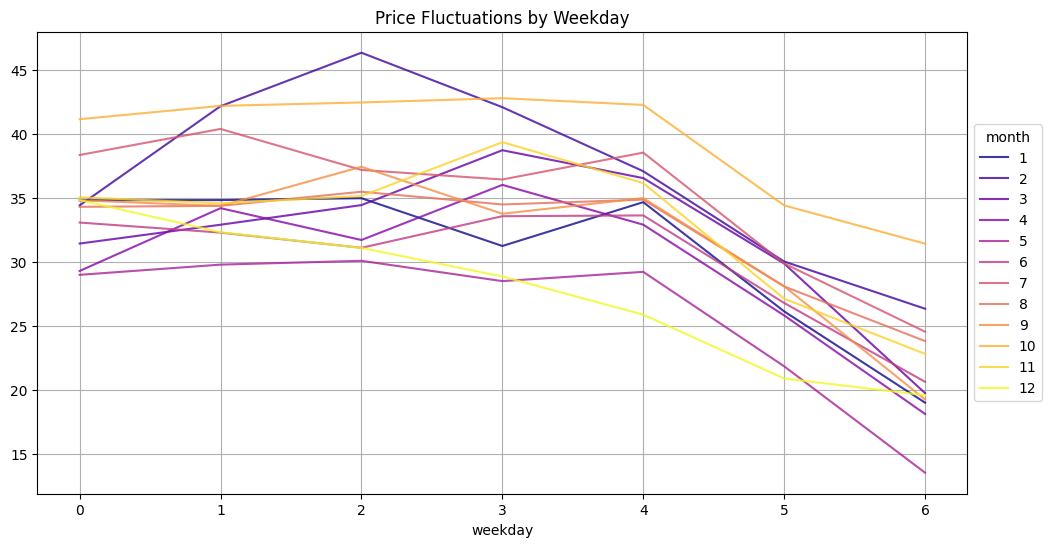

In [21]:
df_y=df[df['year'] == 2015].groupby(['month','weekday'])['price'].mean().reset_index()
fig, ax = plt.subplots() 
pd.pivot_table(data=df_y, index='weekday', columns='month')['price'].plot(cmap='plasma', alpha=0.8, ax=ax)
ax.legend(title='month', loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()
ax.set(title=f'Price Fluctuations by Weekday')

<Axes: xlabel='year'>

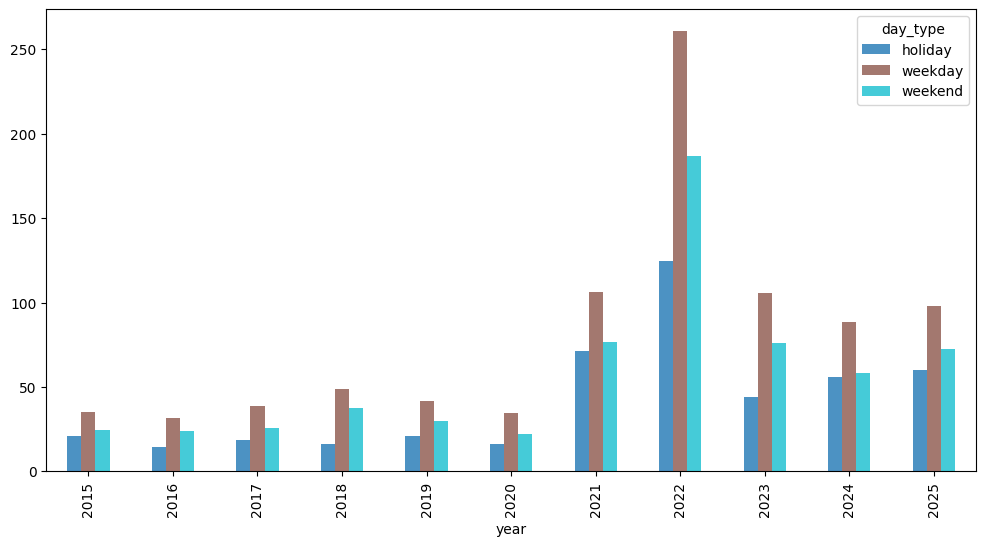

In [22]:
df_y=df.groupby(['year','day_type'])['price'].mean().reset_index()
df_y.pivot(index='year', columns='day_type', values='price').plot(kind='bar', cmap='tab10', alpha=0.8)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96336 entries, 0 to 96335
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             96336 non-null  float64       
 1   c_by_hour         96336 non-null  int64         
 2   load_forecast_da  95229 non-null  float64       
 3   load_actual       96327 non-null  float64       
 4   off_wind_da       96336 non-null  float64       
 5   off_wind_act      96336 non-null  float64       
 6   on_wind_da        96333 non-null  float64       
 7   on_wind_act       96288 non-null  float64       
 8   solar_da          96333 non-null  float64       
 9   solar_act         96288 non-null  float64       
 10  gen_forecast_da   63598 non-null  float64       
 11  gen_actual        96336 non-null  float64       
 12  res_sum_da        96336 non-null  float64       
 13  res_sum_act       96336 non-null  float64       
 14  date              9633

<Axes: >

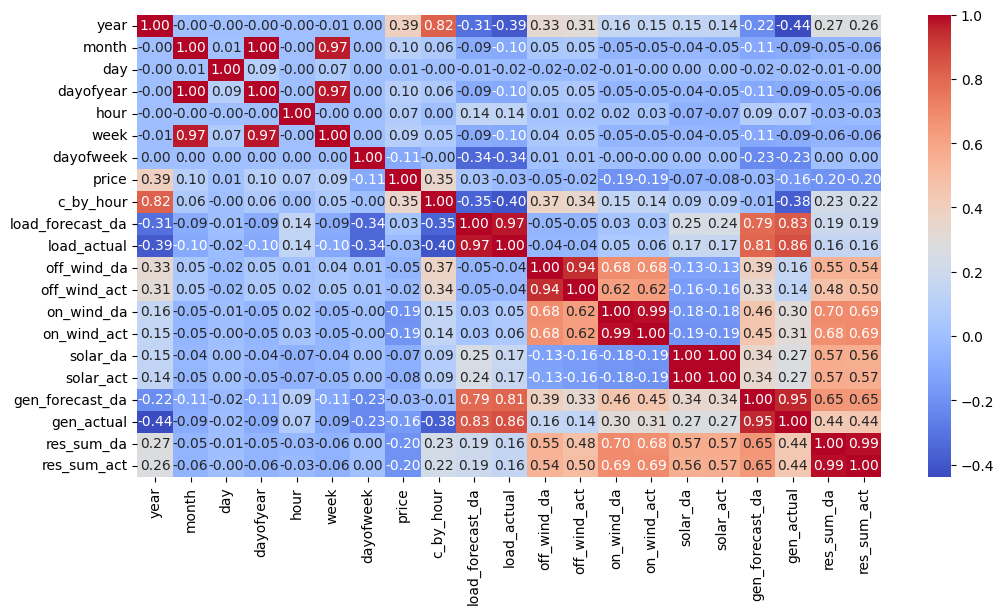

In [24]:
df_corr = df_all.select_dtypes(include=[np.number]).corr()
sns.heatmap(df_corr, annot=True,fmt='.2f', cmap='coolwarm')

In [27]:
df.columns

Index(['price', 'c_by_hour', 'load_forecast_da', 'load_actual', 'off_wind_da',
       'off_wind_act', 'on_wind_da', 'on_wind_act', 'solar_da', 'solar_act',
       'gen_forecast_da', 'gen_actual', 'res_sum_da', 'res_sum_act', 'date',
       'year', 'month', 'day', 'weekday', 'hour', 'dayofyear', 'is_holiday',
       'day_type'],
      dtype='object')

In [34]:
def plot_fluctuations(df,label):    
    fig, ax = plt.subplots() 

    pd.pivot_table(data=df[['year', 'dayofyear', label]], index='dayofyear', columns='year')[label].plot(cmap='plasma', alpha=0.8, ax=ax)
    ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()
    plt.tight_layout()
    ax.set(title=f'Daily {label} Fluctuations', ylabel=label, xlabel='Day of Year');


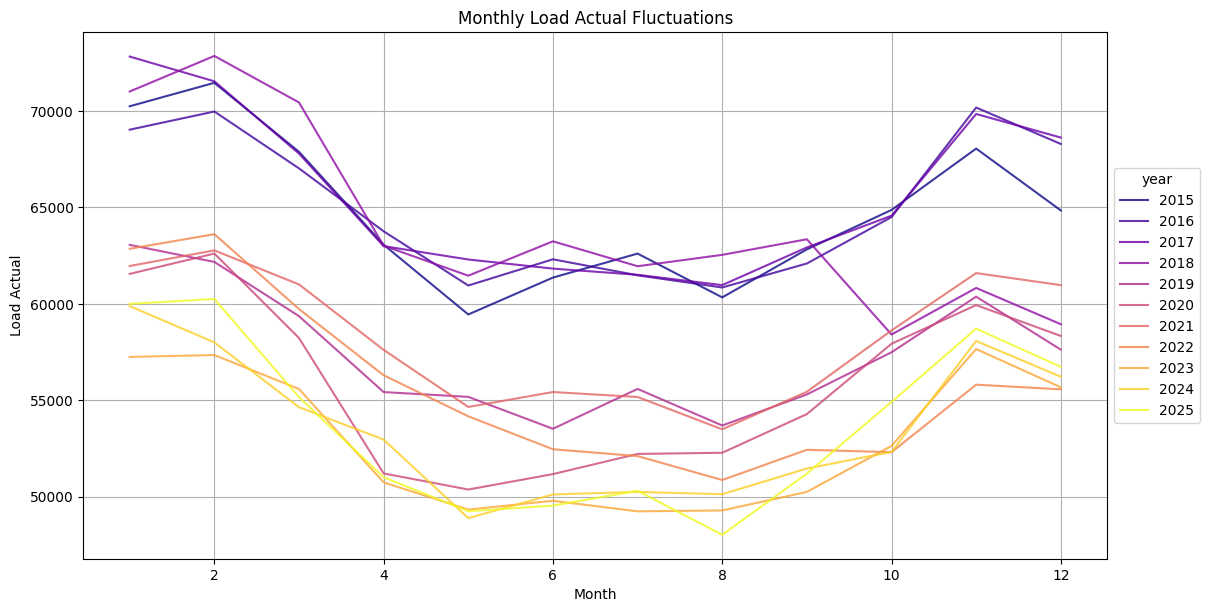

In [41]:
fig, ax = plt.subplots() 
pd.pivot_table(data=df[['year','month','dayofyear', 'load_actual']], index='month', columns='year')['load_actual'].plot(cmap='plasma', alpha=0.8, ax=ax)
ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.tight_layout()
ax.set(title=f'Monthly Load Actual Fluctuations', ylabel='Load Actual', xlabel='Month');


In [42]:
df.isna().sum()

price                   0
c_by_hour               0
load_forecast_da     1107
load_actual             9
off_wind_da             0
off_wind_act            0
on_wind_da              3
on_wind_act            48
solar_da                3
solar_act              48
gen_forecast_da     32738
gen_actual              0
res_sum_da              0
res_sum_act             0
date                    0
year                    0
month                   0
day                     0
weekday                 0
hour                    0
dayofyear               0
is_holiday              0
day_type                0
dtype: int64

In [47]:
df.query('year > 2018').isna().sum()

price                0
c_by_hour            0
load_forecast_da    50
load_actual          0
off_wind_da          0
off_wind_act         0
on_wind_da           3
on_wind_act          0
solar_da             3
solar_act            0
gen_forecast_da      3
gen_actual           0
res_sum_da           0
res_sum_act          0
date                 0
year                 0
month                0
day                  0
weekday              0
hour                 0
dayofyear            0
is_holiday           0
day_type             0
dtype: int64